In [1]:
from glob import glob
import numpy as np
import pandas as pd
import xarray as xr
import geopandas as gpd
import salem
import dask

import climate_utils as cu
import python_utils as pu

In [ ]:
############
### Dask ###
############
from dask.distributed import LocalCluster
cluster = LocalCluster(
    n_workers=40,       # Match number of physical cores
    threads_per_worker=1,  # One thread per worker
    processes=True,     # Use processes instead of threads
)
client = cluster.get_client()
client

## Temperature for load

In [ ]:
# Define TGW experiment and bounds
tgw_vars = ['T2C']
tgw_experiment = "historical_1980_2019"
tgw_years = np.arange(2002, 2002+1)

tgw_paths = [glob(f"{pu.tgw_path}/{tgw_experiment}/hourly/*_{year}-*") for year in tgw_years]
tgw_paths = [path for sub_path in tgw_paths for path in sub_path] # flatten

# Parallelize with dask
delayed = []

for path in tgw_paths:
    delayed.append(dask.delayed(cu.tgw_to_zones)(path, tgw_vars))

# Store
df_out = pd.concat(dask.compute(*delayed))

In [ ]:
df_out

<Axes: xlabel='time'>

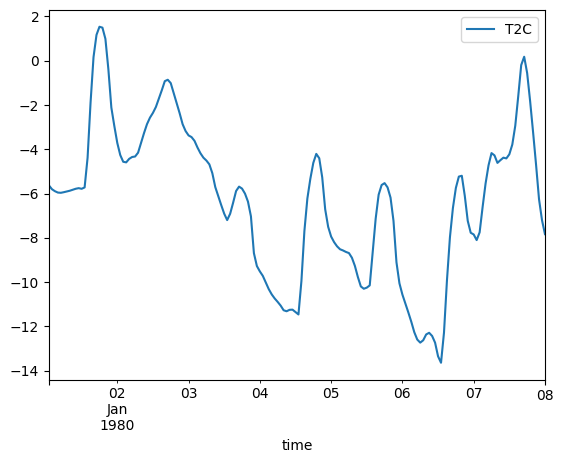

In [9]:
df.loc['A'].plot()